In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [67]:
df=pd.read_csv("city_day.csv")
print(df.shape)
df.head()
print(df.columns)

(29531, 16)
Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [69]:
df.info()
df.isna().sum()
df["AQI"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


AQI
102.0     223
100.0     222
70.0      208
106.0     208
78.0      198
         ... 
1044.0      1
679.0       1
1222.0      1
1459.0      1
13.0        1
Name: count, Length: 829, dtype: int64

In [71]:
df["PM2.5"] = df["PM2.5"].fillna(df["PM2.5"].mean())

df["PM10"] = df["PM10"].fillna(df["PM10"].mean())

df["NO"] = df["NO"].fillna(df["NO"].mean())

df["NO2"] = df["NO2"].fillna(df["NO2"].mean())

df["NOx"] = df["NOx"].fillna(df["NOx"].mean())

df["NH3"] = df["NH3"].fillna(df["NH3"].mean())

df["CO"] = df["CO"].fillna(df["CO"].mean())

df["SO2"] = df["SO2"].fillna(df["SO2"].mean())

df["O3"] = df["O3"].fillna(df["O3"].mean())

df["Benzene"] = df["Benzene"].fillna(df["Benzene"].mean())

df["Toluene"] = df["Toluene"].fillna(df["Toluene"].mean())

df["Xylene"] = df["Xylene"].fillna(df["Xylene"].mean())

df["AQI"] = df["AQI"].fillna(df["AQI"].mean())

In [73]:

df = df.drop(['City', 'Date', 'AQI_Bucket'], axis=1)
df.isna().sum()


PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [111]:
X = df.drop('AQI', axis=1)
# print(X.iloc[0].tolist())
y = df['AQI']
# print(y.iloc[0])



In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [85]:
y_pred = knn.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2516.8372557955413
R2 Score: 0.8330516172505328


In [113]:
sample_input =[[110, 150, 25, 40, 65, 20, 1.5, 12, 5, 1.2, 2.5, 0.3]]
# Same as 
# print(X.columns.tolist())
sample_input_scaled = scaler.transform(sample_input)
predicted_aqi = knn.predict(sample_input_scaled)
print("Predicted AQI:", predicted_aqi[0])


Predicted AQI: 255.29271629778674


E:\Softwares\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


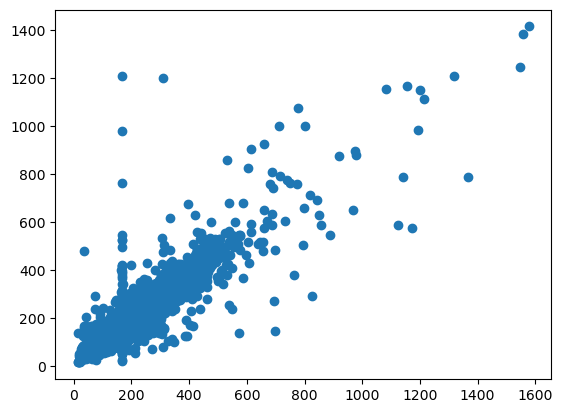

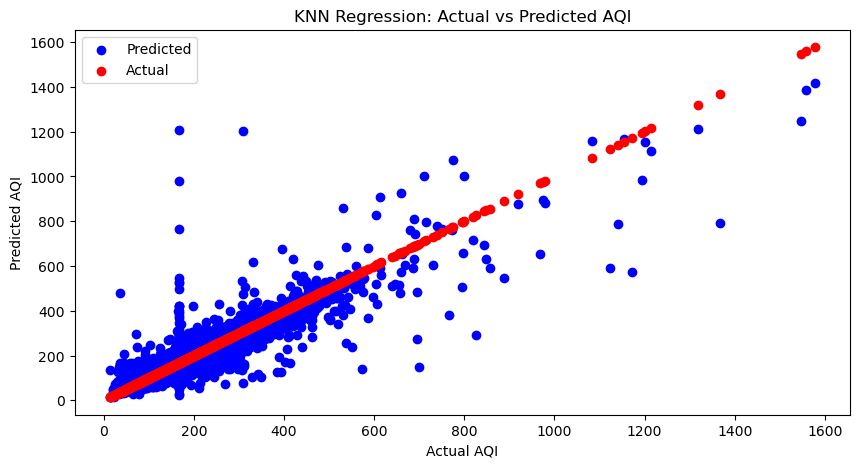

In [129]:
plt.scatter(y_test, y_pred) 
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('KNN Regression: Actual vs Predicted AQI')
plt.legend()
plt.show()

MSE:2516.8372557955413
R-squared:0.8330516172505328


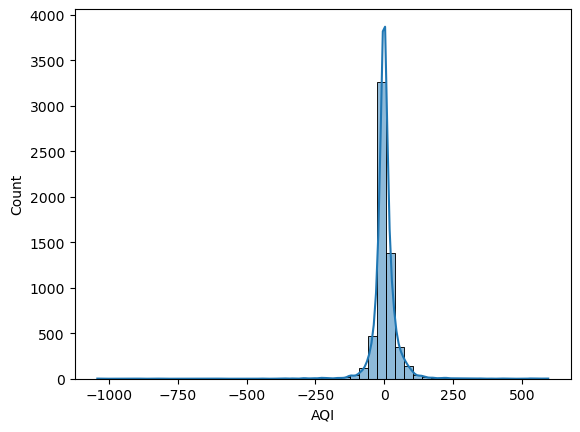

In [131]:
sns.histplot((y_test - y_pred), bins=50, kde=True)
print(f"MSE:{mse(y_test,y_pred)}")
print(f"R-squared:{r2_score(y_test,y_pred)}")

In [137]:
joblib.dump(knn, 'aqi_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']